In [1]:
cat('Last updated ', date())

Last updated  Tue Oct 11 17:40:28 2022

# Applied Survival Analysis Using R 
### Book by Dirk F. Moore

## 4. Nonparametric Comparison of Survival Distributions

* Note : This note book is created with R in Jupyter Notebook.
* Note : I made this note book by coping graphs of the book. Additional R code in addition to the book is added if necessary.  For detail explanation, refer the book. 

In [2]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

## 4.1 Comparing Two Groups of Survival Time

### Example 4.1 Consider a hypothetical comparative clinical trial with six subjects assigned to either a control or treatment group.

To test hypothesis two groups of survival time, the functon survdiff shows the chi-square statistics.

In [3]:
library(survival)

In [4]:
tt <- c(6, 7, 10, 15, 19, 25) # Surviv time
delta <- c(1, 0, 1, 1, 0, 1) # Censor
trt <- c(0, 0, 1, 0, 1, 1) # Group
survdiff(Surv(tt, delta) ~ trt)

Call:
survdiff(formula = Surv(tt, delta) ~ trt)

      N Observed Expected (O-E)^2/E (O-E)^2/V
trt=0 3        2     1.08     0.776      1.27
trt=1 3        2     2.92     0.288      1.27

 Chisq= 1.3  on 1 degrees of freedom, p= 0.3 

* The p-value=0.3, indicating that the group difference is not statistically significant. (We fail to reject the null hypothesis)

### Example 4.2 We want to test hypothesis if two stages has different survival time in the data set "pancreatic" in the "asaur" package. 

* Locally advanced pancreatic cancer (LAPC)
* Metastatic pancreatic cancer (MPC)

In [5]:
# install.packages('asaur')

In [6]:
library(asaur)

In [7]:
head(pancreatic)

,stage,onstudy,progression,death
,<fct>,<fct>,<fct>,<fct>
1,M,12/16/2005,2/2/2006,10/19/2006
2,M,1/6/2006,2/26/2006,4/19/2006
3,LA,2/3/2006,8/2/2006,1/19/2007
4,M,3/30/2006,.,5/11/2006
5,LA,4/27/2006,3/11/2007,5/29/2007
6,M,5/7/2006,6/25/2006,10/11/2006


* Stage : M (MPC), LA(LAPC)
* onstudy: the date of entry
* progression: if that was observed before death
* death: the date of date


* Paient4 died with no recoreded progression. SO, the person's PFS(Progression-free survival) is time to death. For the five other patients in this list the PFS is time to the date of progression.

In [8]:
attach(pancreatic)

__Note__ to download the data as excel data into your computer, set the directory and write "write.csv" 

In [9]:
setwd('C:/Users/shims/Desktop/Bio-Statistics/Survival Analysis Study2') 

In [10]:
pancreatic <- write.csv(pancreatic,"pancreatic.csv")

__convert the text dates into R dates__

In [11]:
# Code in the book
# Progression.d <- as.Date(as.character(progression))
# OnStudy.d <- as.Date (as.character(onstudy))
# Death.d <- as.Date (as.character(death))

In [12]:
Progression.d <- as.Date(progression, format = "%m/%d/%Y")
OnStudy.d <- as.Date(onstudy, format = "%m/%d/%Y")
Death.d <- as.Date(death, format = "%m/%d/%Y")

__compute progression-free survival__

In [13]:
progressionOnly <- Progression.d - OnStudy.d
overallSurvival <- Death.d - OnStudy.d
pfs <- progressionOnly
pfs[is.na(pfs)] <- overallSurvival [is.na(pfs)] # days

In [14]:
# Example1
Progression.d[1]
OnStudy.d[1]
pfs[1]

[1] "2006-02-02"

[1] "2005-12-16"

Time difference of 48 days

In [15]:
# Example2
Progression.d[4]
Death.d[4]
OnStudy.d[4]
pfs[4]

[1] NA

[1] "2006-05-11"

[1] "2006-03-30"

Time difference of 42 days

__convert pfs to months__

In [16]:
pfs.month <- pfs /30.5

note that no observations are censored . This is advanced stage pancreatic cancer .

In [17]:
library(survival)

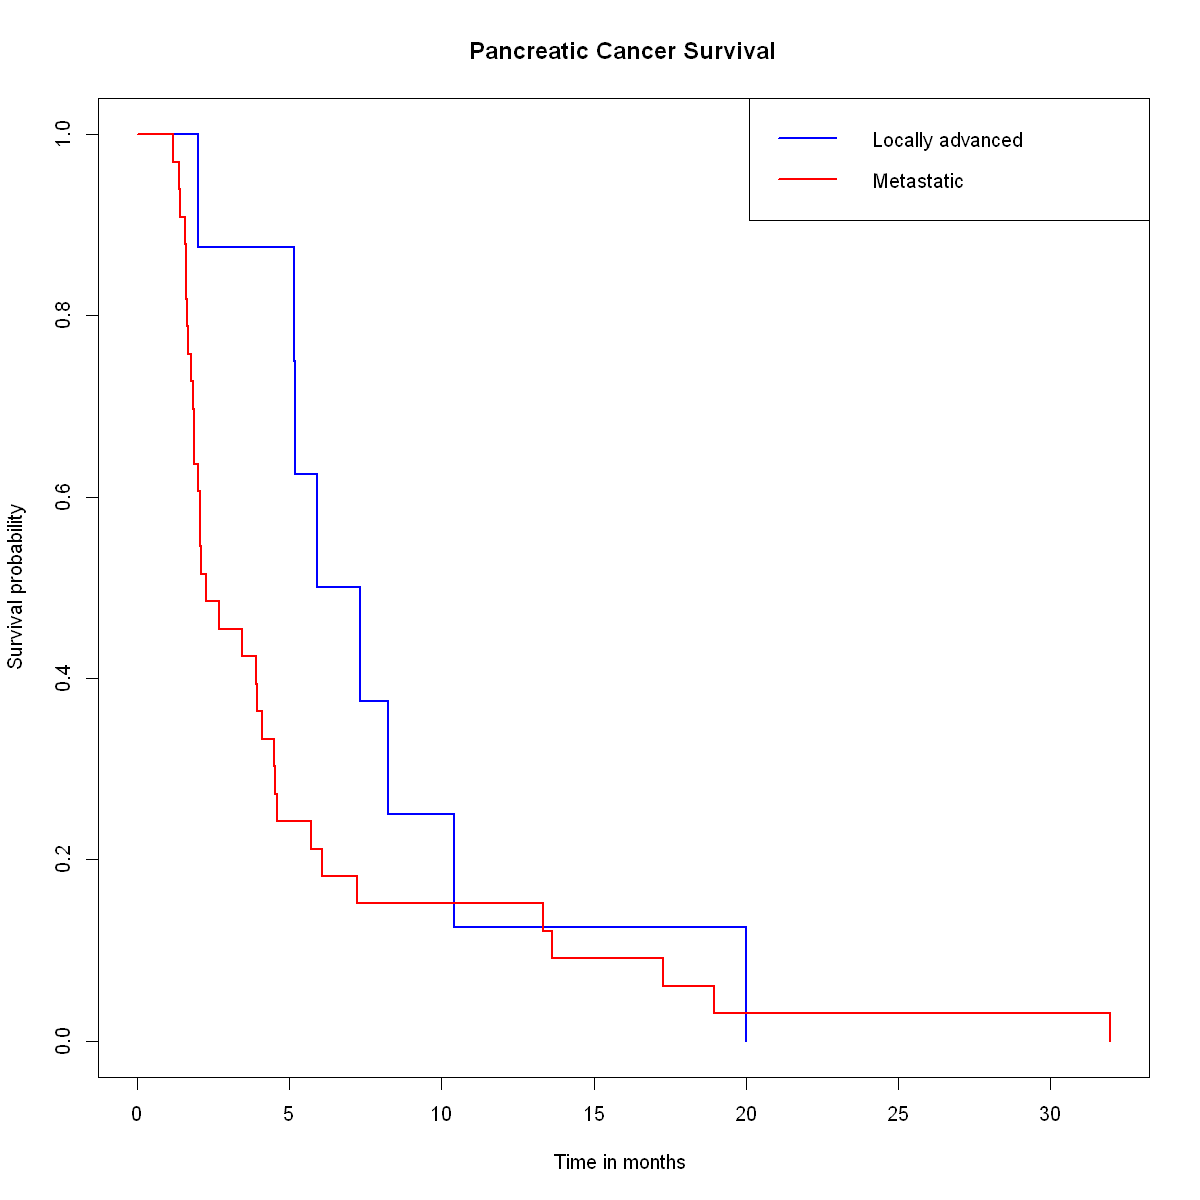

In [18]:
options(repr.plot.width=10, repr.plot.height=10)

plot (survfit( Surv (pfs.month) ~ stage ) , xlab ="Time in months " ,
ylab =" Survival probability ", ylim = c(0,1), col=c (" blue " , " red ") , lwd=2, main='Pancreatic Cancer Survival')

legend ("topright" , legend=c (" Locally advanced " , " Metastatic ") ,
col=c("blue" ,"red") , lwd=2)

__The log-rank test__

In [19]:
survdiff(Surv(pfs) ~ stage, rho=0)

#rho=0 is default value, thus it does not need to be specified.

Call:
survdiff(formula = Surv(pfs) ~ stage, rho = 0)

          N Observed Expected (O-E)^2/E (O-E)^2/V
stage=LA  8        8     12.3      1.49      2.25
stage=M  33       33     28.7      0.64      2.25

 Chisq= 2.2  on 1 degrees of freedom, p= 0.1 

The value of chi-square statistics is 2.2 with 1 degrees of freedom, and the p-value is 0.1, which is not statistically significant between two groups.

__If we use the Prentice modification, we must use $\rho = 1$__

In [20]:
 survdiff(Surv(pfs) ~ stage, rho=1)

Call:
survdiff(formula = Surv(pfs) ~ stage, rho = 1)

          N Observed Expected (O-E)^2/E (O-E)^2/V
stage=LA  8     2.34     5.88     2.128      4.71
stage=M  33    18.76    15.22     0.822      4.71

 Chisq= 4.7  on 1 degrees of freedom, p= 0.03 

Here, the p-value is 0.03, which is significantly the two groups are different at the $\alpha$ level 0.05. This version of the test places __higer weight on earlier survival times.__ From the Fig. 4.2, we see the difference between the two curves before the time = 10. But the survival curves converge after about 10 months. This issue will be discussed later when we have time dependent covariaes and non-proportional hazards.

In [21]:
detach(pancreatic)

## 4.2 Stratified Tests

If there is a need to compare two groups while adjusting for another covariate, there are two approaches one can use.
    
* One way is to include the other covariate (or multiple covariates) as regression terms for the hazard function (Chapter 5)
* Alternavively, if the covariate we are adjusting for is categorical with a small number of levels G, we may construct a stratified log-rank test. 

As an example, consider the data set "pharmasoSmoking" in the "asaur" package. <br>
The primary goal is to compare the time to return to smoking between two treatmenet groups. We use a log-rank test to compare the two groups. 

In [22]:
library(asaur)

In [23]:
?pharmacoSmoking

In [24]:
attach (pharmacoSmoking)

In [25]:
survdiff(Surv(ttr, relapse) ~ grp)

Call:
survdiff(formula = Surv(ttr, relapse) ~ grp)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
grp=combination 61       37     49.9      3.36      8.03
grp=patchOnly   64       52     39.1      4.29      8.03

 Chisq= 8  on 1 degrees of freedom, p= 0.005 

If we think the group comparison may differ by age, we may define a categorical variable using age. <br> ageGroup2 devides the age into two groups, 1. 21-49 , 2. 50+

In [26]:
 table(ageGroup2)

ageGroup2
21-49   50+ 
   66    59 

The log-rank test stratified on "ageGroup2" is below.

* ttr: Time in days until relapse
* relapse: Indicator of relapse (return to smoking)
* grp: Randomly assigned treatment group with levels combination or patchOnly
* ageGroup2: Age group with levels 21-49 or 50+

In [27]:
library(survival) 

In [28]:
survdiff(Surv(ttr, relapse) ~ grp + strata(ageGroup2))

Call:
survdiff(formula = Surv(ttr, relapse) ~ grp + strata(ageGroup2))

                 N Observed Expected (O-E)^2/E (O-E)^2/V
grp=combination 61       37     49.1      2.99      7.03
grp=patchOnly   64       52     39.9      3.68      7.03

 Chisq= 7  on 1 degrees of freedom, p= 0.008 

The chi-square test differs only slightly from the unadjusted value, indicating that it was necessary to stratify on thie variable. (but the p-value is smaller than 0.05)

In [29]:
detach (pharmacoSmoking)

### Example 4.3: the impact of a confounder

We use a simulated data in this example. <br>
Suppose...
* a simulated data set from a clinical trial comparing a standard therapy (control) to an experimental therpy (treated)
* the survival times are exponentially distributed.
* no censoring
* there exists a confounding variable "genotype" , either wild type (normal) or mutant. Patients carrying the mutant genotype have a considerably poorer prognosis.
<br>

* The hazard rate for a mutant patient in the control group at 0.03 per day
* The hazard rate for wild type patient is reduced by a factor of 0.2 as compared to mutant patients.
* The effect of treatment for a mutant patient is to reduce the hazard by a factor of 0.55. (same effect of treatment on the wild type patients)



__(0) Set up the four hazard rates__

In [30]:
lambda.mutant.0 <- 0.03 # mutant in the control
lambda.mutant.1 <- 0.03*0.55 # mutant in the treatment
lambda.wt.0 <- 0.03*0.2 # wild in the control
lambda.wt.1 <- 0.03*0.2*0.55 # wild in the treatment

__(1) Set a "seed" for the random variable generator, so that this example produce same output each time.__

In [31]:
set.seed(4321)

__(2) generate exponential randomvariables and string them together in to the variable "ttAll"__

In [32]:
tt.control.mutant <- rexp(25, rate=lambda.mutant.0)
tt.treat.mutant <- rexp(125, rate=lambda.mutant.1)
tt.control.wt <- rexp(125, rate=lambda.wt.0)
tt.treat.wt <- rexp(25, rate=lambda.wt.1)
ttAll <- c(tt.control.mutant, tt.treat.mutant, tt.control.wt,
tt.treat.wt)

__(3) create the consoring variagle "status"__

In [33]:
status <- rep(1, length(ttAll))

__(4) create the treatment variable "trt" and genotype variable__

In [34]:
genotype <- c(rep("mutant", 150), rep("wt", 150))
trt <- c(rep(0, 25), rep(1, 125), rep(0, 125), rep(1, 25))

__(5) compare two groups: control, treatment using the log-rank test__

In [35]:
library(survival) 

In [36]:
survdiff(Surv(ttAll, status) ~ trt)

Call:
survdiff(formula = Surv(ttAll, status) ~ trt)

        N Observed Expected (O-E)^2/E (O-E)^2/V
trt=0 150      150      183      6.00      15.9
trt=1 150      150      117      9.41      15.9

 Chisq= 15.9  on 1 degrees of freedom, p= 7e-05 

The log_rank test appears to confirm this with a very strong p-value.

__(6) Draw a graph__

### Fig. 4.3 Comparison of the Kaplan-Meier survival curves for two treatments ignoring the gene confounder (left) and accounting for it (right)

In [37]:
result.km1 <- survfit(Surv(ttAll, status) ~ trt)
result.km2 <- survfit(Surv(ttAll, status) ~ trt + genotype)

In [38]:
library(repr)

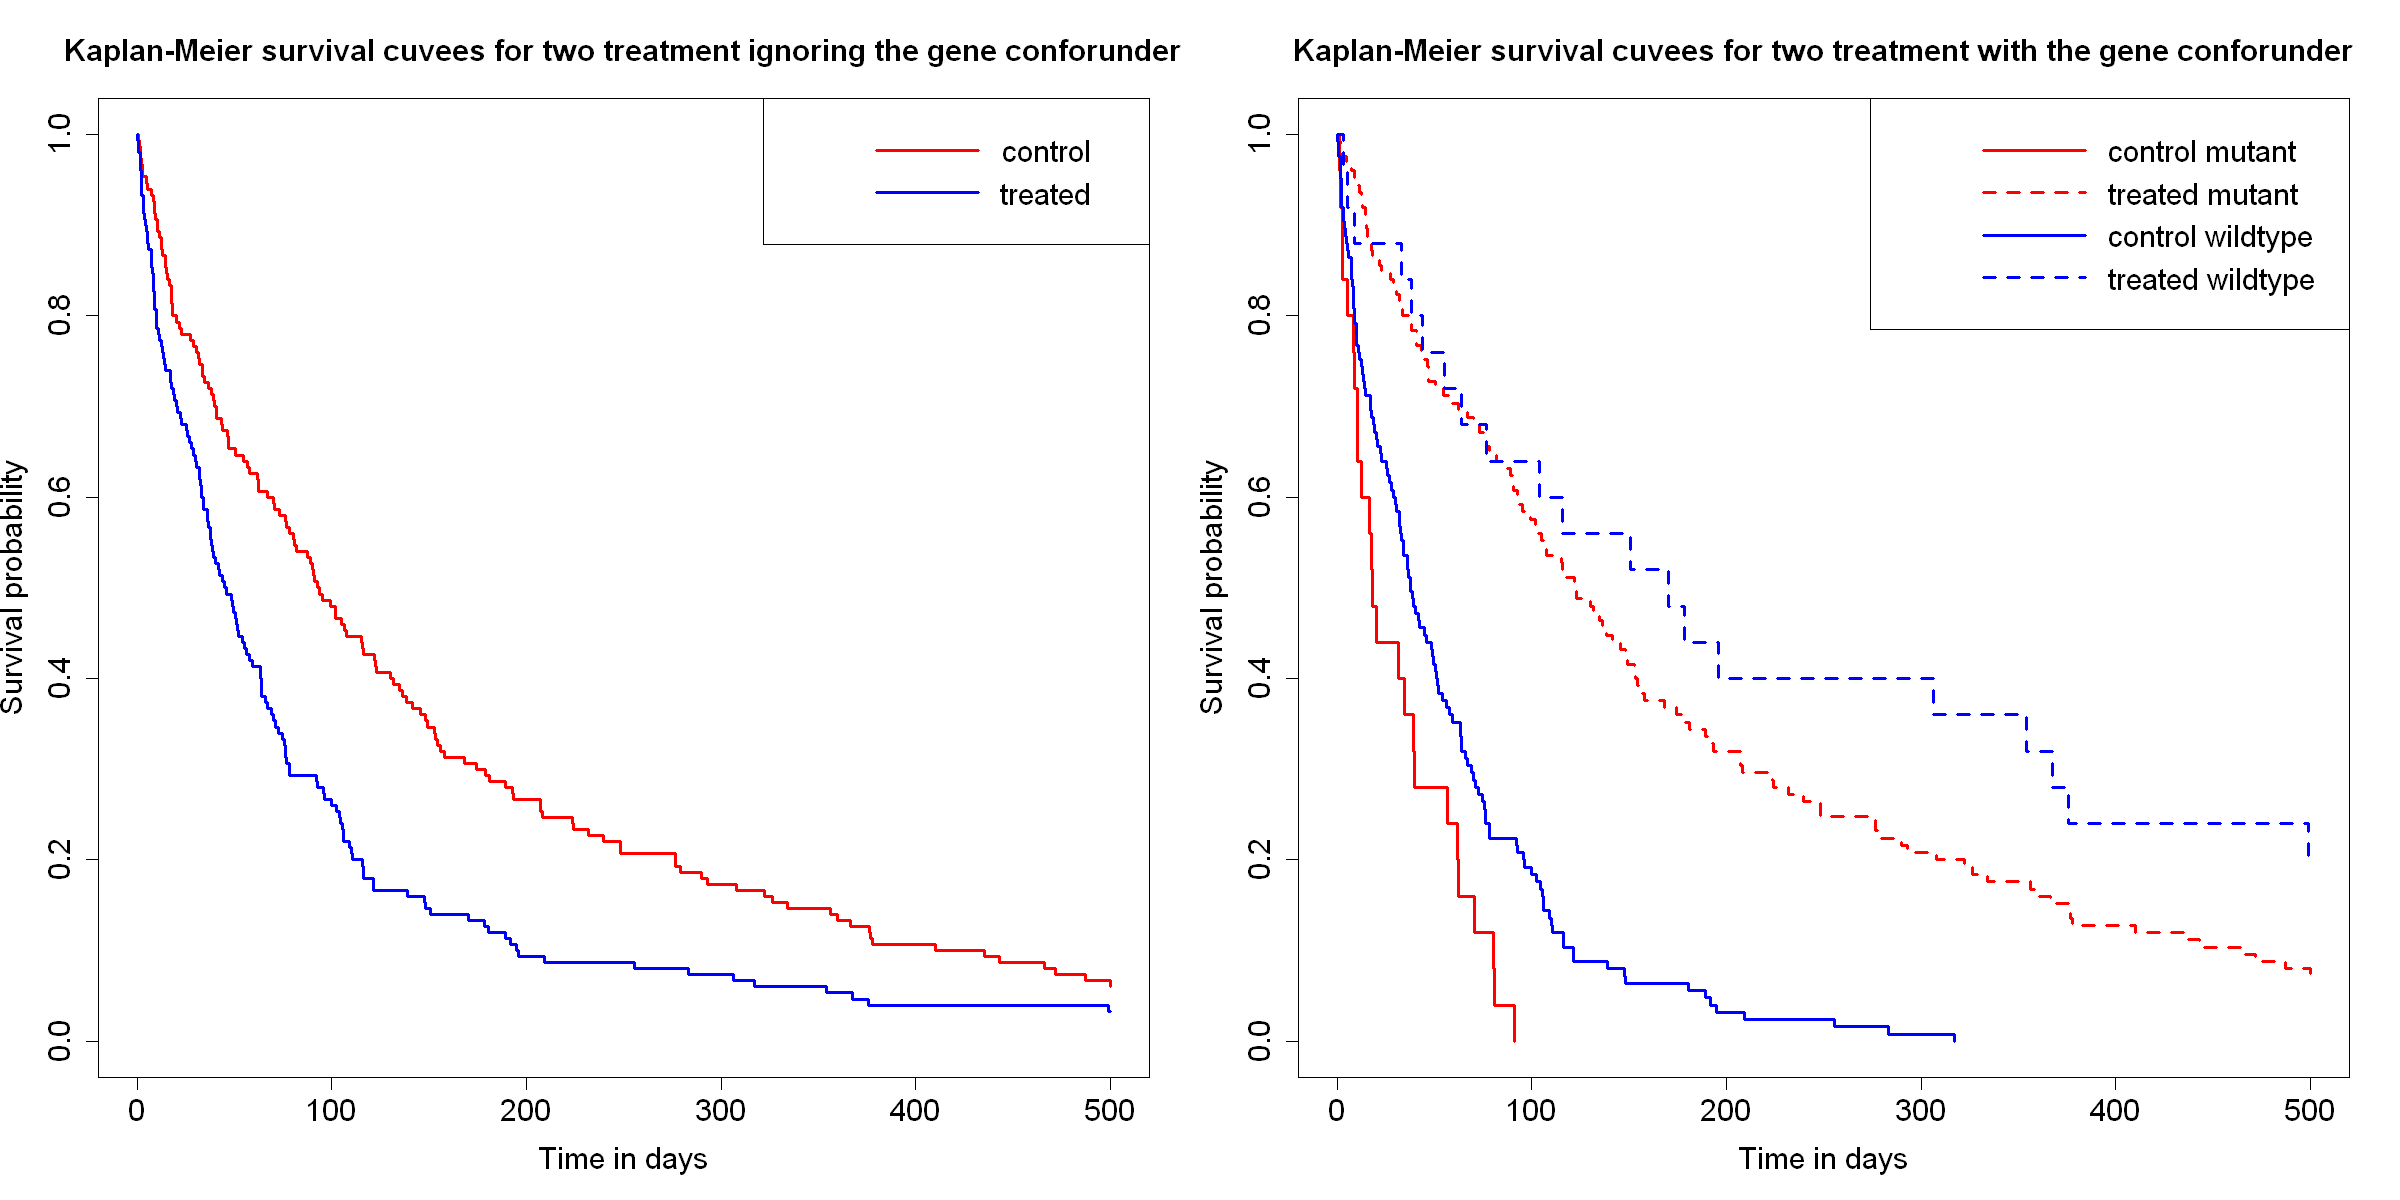

In [39]:
par(mfrow = c(1,2)) 
# windows(height = 0.1, width = 3.5)
options(repr.plot.width=20, repr.plot.height=10)
plot(result.km1, conf.int=F, col=c('red', 'blue'), xlim=c(0,500), main='Kaplan-Meier survival cuvees for two treatment ignoring the gene conforunder', 
    ylab='Survival probability', xlab='Time in days',
    cex.lab=1.5, cex.axis=1.5, cex.sub=1.5, cex.main=1.5, lwd=3)

legend("topright", legend=c("control", "treated"), lty=1, col=c('red','blue'), 
       lwd=3, #line width
       adj=1, # adjust text location (closed to the line)
       text.width=1, # box scale
       cex=1.5, # scale up
       seg.len=0.9, # line length
       y.intersp=0.7, # length between line
#        x.intersp=0.1,  # space between line and text
      )


plot(result.km2, conf.int=F, col=c('red', 'red', 'blue', 'blue'), xlim=c(0,500), lty=c(1,2,1,2)
    , main='Kaplan-Meier survival cuvees for two treatment with the gene conforunder',  
    ylab='Survival probability', xlab='Time in days',
    cex.lab=1.5, cex.axis=1.5, cex.sub=1.5, cex.main=1.5, lwd=3)



legend("topright", legend=c("control mutant", "treated mutant","control wildtype", "treated wildtype"), 
       lty=c(1,2,1,2),
       col=c('red', 'red', 'blue', 'blue'), 
       lwd=3, #line width
#        rect=c(10,10,400,0.8),
       cex=1.5, # scale up
       seg.len=0.9, # line length
#        adj=0.4, # adjust text location (closed to the line)
       text.width=95, # box scale
       y.intersp=0.7, # length between line
       x.intersp=0.2,  # space between line and text
      )


However, when we plot the survival curves comparing treatment to control separately for the mutant and wild type patients, we see that within each genotype the treatment is actully superior to the control. We can confirm this using  a stratified log-rank test. 

In [40]:
survdiff(Surv(ttAll, status) ~ trt + strata(genotype))

Call:
survdiff(formula = Surv(ttAll, status) ~ trt + strata(genotype))

        N Observed Expected (O-E)^2/E (O-E)^2/V
trt=0 150      150      133      2.17      7.57
trt=1 150      150      167      1.73      7.57

 Chisq= 7.6  on 1 degrees of freedom, p= 0.006 

The p-value shows that the difference is highly significant. However, the function "survdiff" does not tell which treatment is the superior one. So it is importnt to also consult the plot to ascertain the directional effect of treatment. 

The explanation for the confounding is that (1) the treatment improves survival
compared to the control, (2) patients carrying the wild type form of the gene
have better survival than do patients carrying the mutation, and (3) there are more
mutation-carrying patients in the treatment group than in the control group, whereas
the reverse is true for wild type patients.